Processing image: 00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
Step 1: Original Image


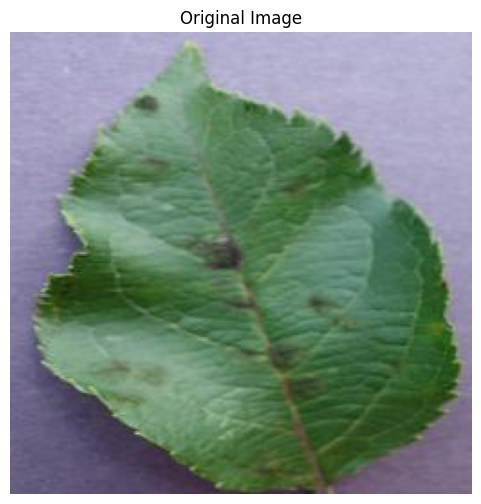

Step 2: Resized Image


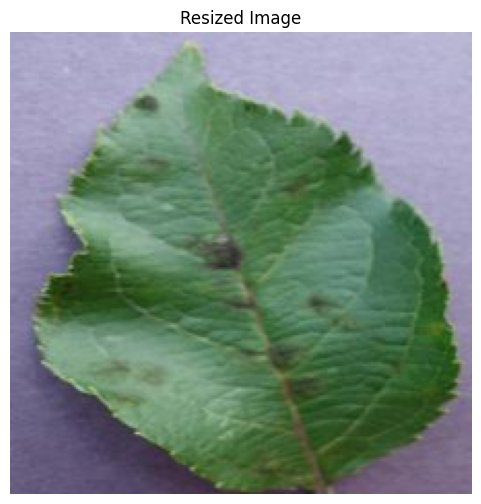

Step 3: BGR Image


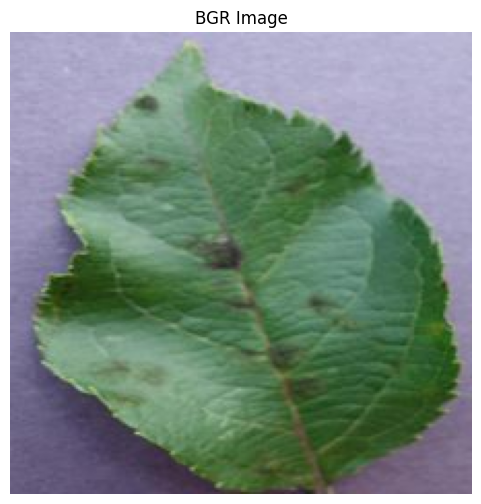

Step 4: Lab Image


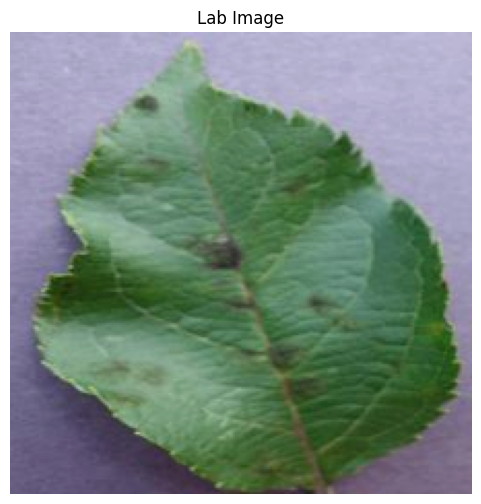

Step 5: Lab with CLAHE


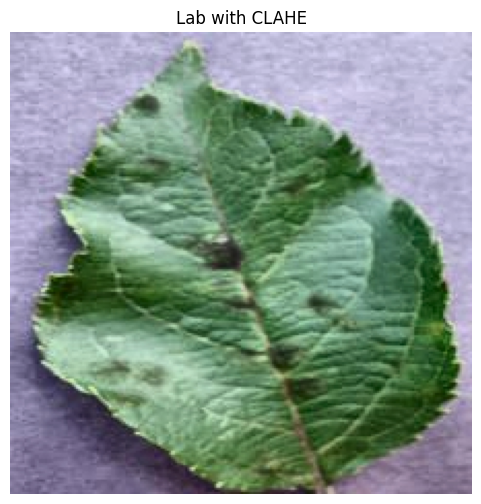

Step 6: BGR with CLAHE


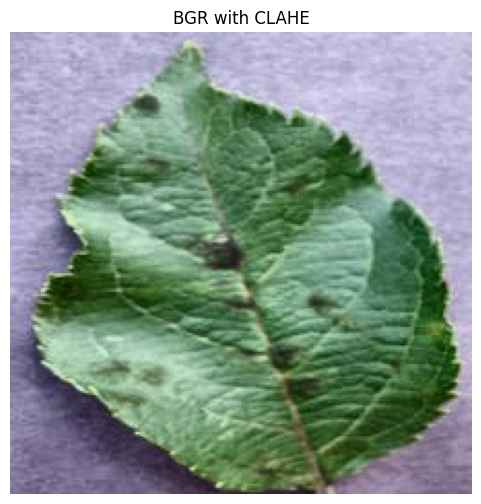

Step 7: Filtered Image (Median Blur)


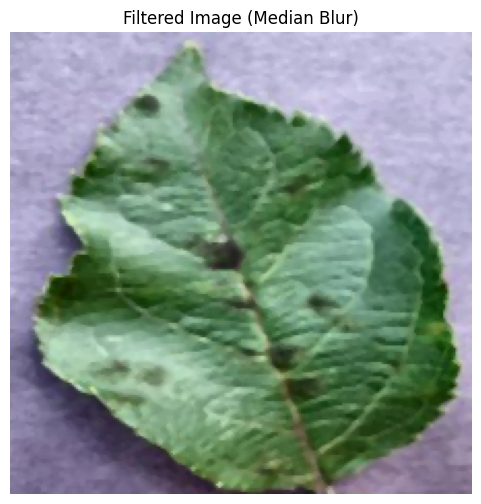

Step 8: Gamma Corrected Image


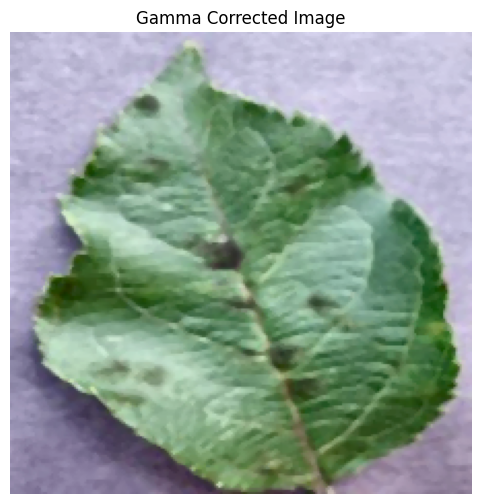

Preprocessing complete!


In [7]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Preprocessing function with step-by-step visualization
def preprocess_image_with_steps(image):
    try:
        steps = []
        steps.append(("Original Image",image))
        # Step 1: Resize the image to 224x224
        resized_image = image.resize((224, 224))
        steps.append(("Resized Image", resized_image))
        
        # Step 2: Convert image from PIL to OpenCV format (BGR)
        bgr_image = np.array(resized_image)
        bgr_image = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2BGR)
        steps.append(("BGR Image", Image.fromarray(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))))

        # Step 3: Convert BGR to Lab
        lab_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2LAB)
        lab_display = Image.fromarray(cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB))
        steps.append(("Lab Image", lab_display))

        # Step 4: Apply CLAHE to L-channel
        l_channel, a_channel, b_channel = cv2.split(lab_image)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        l_channel_clahe = clahe.apply(l_channel)
        lab_clahe_image = cv2.merge((l_channel_clahe, a_channel, b_channel))
        lab_clahe_display = Image.fromarray(cv2.cvtColor(lab_clahe_image, cv2.COLOR_LAB2RGB))
        steps.append(("Lab with CLAHE", lab_clahe_display))

        # Step 5: Convert Lab back to BGR
        bgr_image_clahe = cv2.cvtColor(lab_clahe_image, cv2.COLOR_LAB2BGR)
        bgr_clahe_display = Image.fromarray(cv2.cvtColor(bgr_image_clahe, cv2.COLOR_BGR2RGB))
        steps.append(("BGR with CLAHE", bgr_clahe_display))

        # Step 6: Apply Adaptive Median Filter
        filtered_image = cv2.medianBlur(bgr_image_clahe, ksize=3)
        filtered_display = Image.fromarray(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        steps.append(("Filtered Image (Median Blur)", filtered_display))

        # Step 7: Apply Gamma Correction
        gamma = 1.2
        inv_gamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        gamma_corrected_image = cv2.LUT(filtered_image, table)
        gamma_display = Image.fromarray(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
        steps.append(("Gamma Corrected Image", gamma_display))

        # Display each step
        for i, (step_name, step_image) in enumerate(steps):
            print(f"Step {i + 1}: {step_name}")
            plt.figure(figsize=(6, 6))
            plt.imshow(step_image)
            plt.title(step_name)
            plt.axis("off")
            plt.show()

        return gamma_display
    except Exception as e:
        print(f"Error in preprocessing image: {e}")
        return None

# Dataset path
dataset_path = './split1/Train'
count=0
# Apply preprocessing and visualize each step for a few images
for class_dir in os.listdir(dataset_path):
    
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path):
        if(count>0):
            break
        img_path = os.path.join(class_path, img_file)
        original_image = Image.open(img_path)

        print(f"Processing image: {img_file}")
        preprocessed_image = preprocess_image_with_steps(original_image)
        count+=1
        if preprocessed_image is None:
            print(f"Failed to preprocess image: {img_path}")
        else:
            print("Preprocessing complete!")
    break
